In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv("train.csv")

In [98]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [99]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [100]:
dummies=pd.get_dummies(df.Sex)

In [101]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [102]:
df=pd.concat([df,dummies],axis=1)

In [122]:
df.drop(['Sex'],axis=1,inplace=True)

In [123]:
import seaborn as sns

<AxesSubplot:>

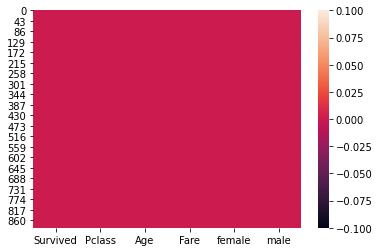

In [124]:
sns.heatmap(df.isnull())

In [125]:
df.Age=df.Age.fillna(df.Age.mean())

In [126]:
df.head()

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


In [127]:
X=df.drop(['Survived'],axis=1)

In [128]:
y=df.Survived

In [129]:
from sklearn.model_selection import train_test_split 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
len(X_train)

712

In [132]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [133]:
X_test

,Pclass,Age,Fare,female,male
709,3,29.699118,15.2458,0,1
439,2,31.000000,10.5000,0,1
840,3,20.000000,7.9250,0,1
720,2,6.000000,33.0000,1,0
39,3,14.000000,11.2417,1,0
...,...,...,...,...,...
433,3,17.000000,7.1250,0,1
773,3,29.699118,7.2250,0,1
25,3,38.000000,31.3875,1,0
84,2,17.000000,10.5000,1,0


In [134]:
from sklearn.naive_bayes import GaussianNB 

In [135]:
model=GaussianNB()

In [136]:
model.fit(X_train, y_train)

GaussianNB()

In [137]:
predictions=model.predict(X_test)

In [139]:
len(predictions)

179

In [147]:
model.score(X_test,y_test)*100

77.6536312849162